In [23]:
from pathlib import Path
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision import datasets ,transforms
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

import argparse
import warnings
warnings.filterwarnings("ignore")

train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
    

CUDA is available!  Training on GPU ...


In [120]:
PATH_train="train"
PATH_test="test"
PATH_val="valid"

TRAIN = Path(PATH_train)

TEST = Path(PATH_test)
Val = Path(PATH_val)


num_workers = 2

batch_size = 64
LR = 0.001

train_transforms = transforms.Compose([  
                         transforms.Resize((224,224)),
                         transforms.RandomHorizontalFlip(), 
                         transforms.ToTensor(), 
                               ])

test_transforms= transforms.Compose([transforms.ToTensor(),
                                      transforms.Resize((224,224)),
                                                        ])

val_transforms= transforms.Compose([transforms.ToTensor(),
                                      transforms.Resize((224,224)),
                                                        ])


train_data = datasets.ImageFolder(TRAIN, transform=train_transforms)
test_data = datasets.ImageFolder(TEST, transform=test_transforms)
val_data = datasets.ImageFolder(Val, transform=val_transforms)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers,shuffle=True,pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size*2,  num_workers=num_workers,pin_memory=True)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size*2,  num_workers=num_workers,pin_memory=True)

dataset_size = len(train_loader)
test_dataset_size = len(test_loader)

images, labels=next(iter(train_loader))
print(images.shape, labels.shape)

torch.Size([64, 3, 224, 224]) torch.Size([64])


In [121]:
len(train_loader),len(test_loader)

(198, 4)

In [122]:
data_path='./'
classes=os.listdir(data_path + "train")
print(len(classes))
print(classes)

100
['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN ARGUS', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH', 'CLEARWING MOTH', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMET MOTH', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'EMPEROR GUM MOTH', 'GARDEN TIGER MOTH', 'GIANT LEOPARD MOTH', 'GLITTERING SAPPHIRE', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREEN HAIRSTREAK', 'GREY HAIRSTREAK', 'HERCULES MOTH', 'HUMMING BIRD HAWK MOTH', 'INDRA SWALLOW', 'IO MOTH', 'Iphiclu

In [123]:
class Butterfly_vs_Classifier_CnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 16, kernel_size=5, padding=0), 
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
 
 
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0), 
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
 
 
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            
            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
 
 
            nn.Flatten(), 
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(8*11*11, 100))
        
    def forward(self, xb):
      return self.network(xb)
 
  
model = FruitCnnModel()
model

FruitCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
    (13): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): MaxPool2d(kernel_size=2, stride=2, paddi

In [126]:

if train_on_gpu:
    model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  

    

n_epochs = 50

valid_loss_min = np.Inf 

train_losses, valid_losses = [], []

for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    valid_loss = 0.0
    print('running epoch: {}'.format(epoch))
    
    
    model.train()
    for data, target in train_loader:
        
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
       
        optimizer.zero_grad()
        
        output = model(data)
        
        loss = criterion(output, target)
        
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item()*data.size(0)
        

    model.eval()
    for data, target in valid_loader:
       
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        output = model(data)
        
        loss = criterion(output, target)
        
        valid_loss += loss.item()*data.size(0)
    
    
    train_losses.append(train_loss/len(train_loader.dataset))
    valid_losses.append(valid_loss/len(valid_loader.dataset))
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        

    print('\tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(train_loss, valid_loss))
    

    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
        
        torch.save(model.state_dict(), 'model_CNN.pth')
        valid_loss_min = valid_loss


        
def test(loaders, model, criterion, use_cuda):


    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders):
        
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        
        output = model(data)
        
        loss = criterion(output, target)
         
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        
        pred = output.data.max(1, keepdim=True)[1]
        
        correct += np.sum(pred.eq(target.data.view_as(pred)).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}'.format(test_loss))
    print('Test Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))

use_cuda = torch.cuda.is_available()
test(test_loader, model, criterion, use_cuda)        


running epoch: 1
	Training Loss: 1.219365 	Validation Loss: 1.002321
Validation loss decreased (inf --> 1.002321).  Saving model ...
running epoch: 2
	Training Loss: 1.191668 	Validation Loss: 1.005435
running epoch: 3
	Training Loss: 1.182129 	Validation Loss: 1.006855
running epoch: 4
	Training Loss: 1.167862 	Validation Loss: 0.974304
Validation loss decreased (1.002321 --> 0.974304).  Saving model ...
running epoch: 5
	Training Loss: 1.146752 	Validation Loss: 1.051923
running epoch: 6
	Training Loss: 1.145451 	Validation Loss: 1.018808
running epoch: 7
	Training Loss: 1.119549 	Validation Loss: 0.967221
Validation loss decreased (0.974304 --> 0.967221).  Saving model ...
running epoch: 8
	Training Loss: 1.100453 	Validation Loss: 1.018015
running epoch: 9
	Training Loss: 1.095090 	Validation Loss: 1.034428
running epoch: 10
	Training Loss: 1.080947 	Validation Loss: 0.958184
Validation loss decreased (0.967221 --> 0.958184).  Saving model ...
running epoch: 11
	Training Loss: 1.08

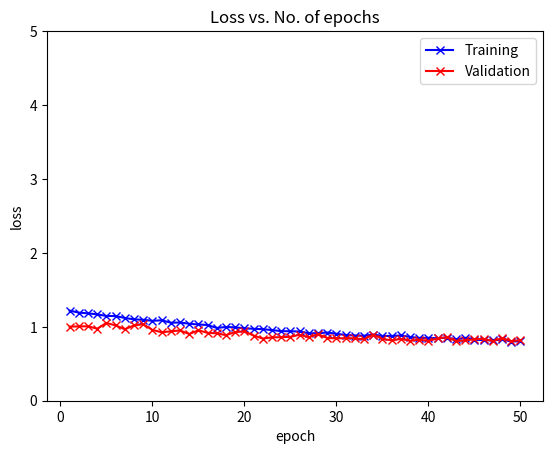

In [133]:
train_losses = [x for x in train_losses]
epochs=[i for i in range(1,51)]
val_losses = [x for x in valid_losses]
plt.plot(epochs,train_losses, '-bx')
plt.plot(epochs,val_losses, '-rx')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0,5)
plt.legend(['Training', 'Validation'])
plt.title('Loss vs. No. of epochs');

plt.show()

In [74]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = (img.unsqueeze(0).cuda())
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_data.classes[preds[0].item()]

Label: APPOLLO Predicted: APPOLLO


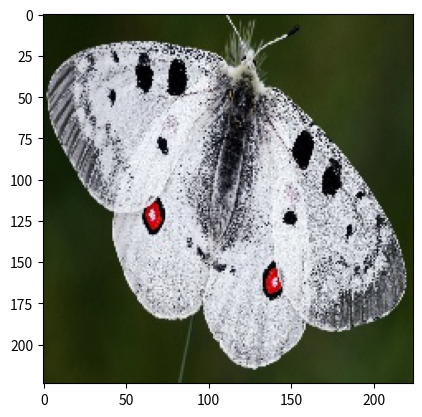

In [118]:
img, label = test_data[20]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_data.classes[label], 'Predicted:', predict_image(img, model))